In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df  =pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 20 - Random Forest Classification/Python/Social_Network_Ads.csv')
print(df.head(10))

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
5   27            58000          0
6   27            84000          0
7   32           150000          1
8   25            33000          0
9   35            65000          0


In [4]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [5]:
#missing values
#categorical data

In [6]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
# print(x_train)
# print(x_test)
# print(y_train)
# print(y_test)

In [7]:
#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)
# print(x_train,x_test)

In [8]:
#training the model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion="gini",max_depth=3,random_state=0,n_estimators=10)
rfc.fit(x_test,y_test)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

In [9]:
#prediction
y_pred=rfc.predict(x_test)
print(y_pred)

print(rfc.predict(ss.transform([[19,19000]])))

df_result = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1),columns=['y_test','y_pred'])
print(df_result.head(10))

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]
[0]
   y_test  y_pred
0       0       0
1       0       0
2       0       0
3       0       0
4       0       0
5       0       0
6       0       0
7       1       1
8       0       0
9       0       1


In [10]:
#confusion matrix analysis
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, mean_squared_error
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
ps= precision_score(y_test,y_pred)
rs= recall_score(y_test,y_pred)
error= mean_squared_error(y_test,y_pred)

print(cm,score,ps,rs,error)

[[57  1]
 [ 1 21]] 0.975 0.9545454545454546 0.9545454545454546 0.025


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


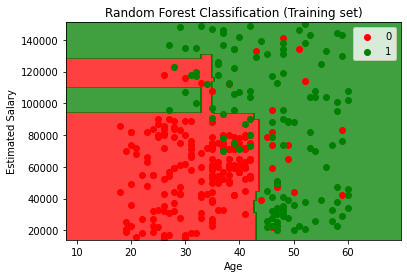

In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = ss.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, rfc.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


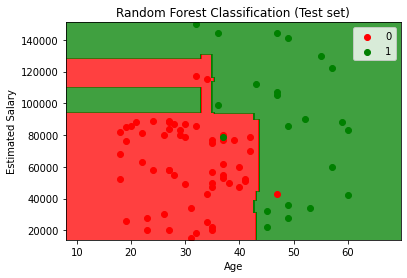

In [12]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = ss.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, rfc.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()